In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# What is the cheapest month to rent a listing?

In [83]:
# read in calendar dataset
calendar = pd.read_csv("calendar.csv", parse_dates=['date'])

In [84]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### Data Preparation

In [85]:
# drop all rows with no price value
df = calendar[['listing_id', 'date', 'price']].dropna().reset_index(drop=True)

In [86]:
# remove $ sign on price values
df['price'] = df['price'].apply(lambda x: x[1:]) 

In [87]:
df.head()

,listing_id,date,price
0,241032,2016-01-04,85.00
1,241032,2016-01-05,85.00
2,241032,2016-01-13,85.00
3,241032,2016-01-14,85.00
4,241032,2016-01-18,85.00


In [88]:
#replace ',' in price values to '', to allow conversion of type to numeric
df['price'] = df['price'].apply(lambda x: x.replace(',',''))

In [89]:
# convert price type from object string to float
df = df.astype({'price':float, 'listing_id':str})

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934542 entries, 0 to 934541
Data columns (total 3 columns):
listing_id    934542 non-null object
date          934542 non-null datetime64[ns]
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 21.4+ MB


In [91]:
df.head()

,listing_id,date,price
0,241032,2016-01-04,85.0
1,241032,2016-01-05,85.0
2,241032,2016-01-13,85.0
3,241032,2016-01-14,85.0
4,241032,2016-01-18,85.0


In [92]:
df.describe()

,price
count,934542.000000
mean,137.944859
std,105.062870
min,10.000000
25%,75.000000
50%,109.000000
75%,160.000000
max,1650.000000


In [93]:
# make dataframe to timeseries by setting index as dates
df.index = df['date']

In [94]:
df.head()

,listing_id,date,price
date,,,
2016-01-04,241032,2016-01-04,85.0
2016-01-05,241032,2016-01-05,85.0
2016-01-13,241032,2016-01-13,85.0
2016-01-14,241032,2016-01-14,85.0
2016-01-18,241032,2016-01-18,85.0


In [95]:
# resample the data by dowsampling to monthly
df_month = df.resample('M').mean()

In [217]:
df_month

,price
date,
2016-01-31,121.568409
2016-02-29,124.293927
2016-03-31,128.644488
2016-04-30,135.097005
2016-05-31,139.538183
2016-06-30,147.473137
2016-07-31,152.094150
2016-08-31,150.656594
2016-09-30,143.255949


In [220]:
# to avoid bias and allow all months to be on thesame scale. Remove 2017 data because it contains only january listings
df_month = df_month.drop(df_month.index[-1])

In [221]:
df_month

,price
date,
2016-01-31,121.568409
2016-02-29,124.293927
2016-03-31,128.644488
2016-04-30,135.097005
2016-05-31,139.538183
2016-06-30,147.473137
2016-07-31,152.094150
2016-08-31,150.656594
2016-09-30,143.255949


### Result visualization

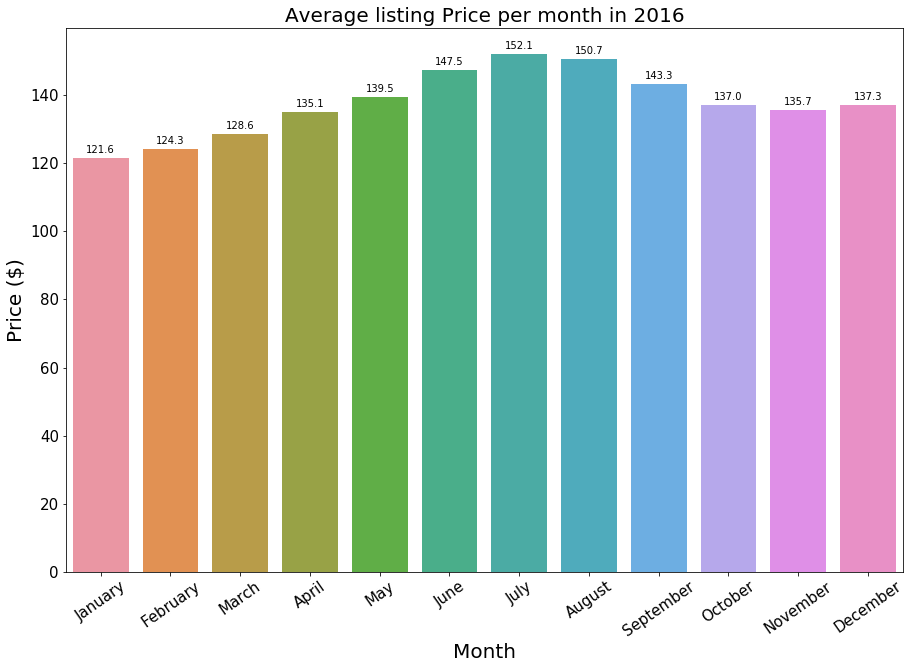

In [223]:
# plot result on a bar chart
fig, ax = plt.subplots(figsize=(15,10))
bars = sns.barplot(x=df_month.index.month_name(), y=df_month.price)
# set axis label properties
ax.set_xlabel('Month', weight='normal', size=20)
ax.set_ylabel('Price ($)', weight='normal', size=20)
plt.title('Average listing Price per month in 2016', fontsize=20)
# set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
# attach a text lable above each bar displaying the price
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate('{:.1f}'.format(height), xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3), # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

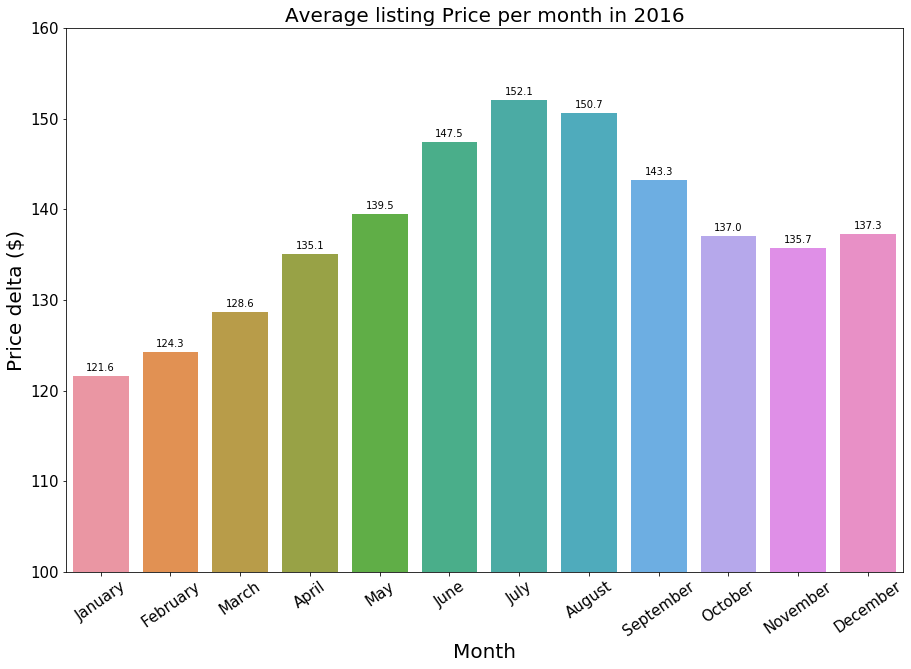

In [224]:
# plot result on a bar chart, zoomed output
fig, ax = plt.subplots(figsize=(15,10))
bars = sns.barplot(x=df_month.index.month_name(), y=df_month.price)
# set axis label properties
ax.set_xlabel('Month', weight='normal', size=20)
ax.set_ylabel('Price delta ($)', weight='normal', size=20)
ax.set_ylim([100,160]) # increase the y origin from 0 to 100
plt.title('Average listing Price per month in 2016', fontsize=20)
# set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
# attach a text lable above each bar displaying the price
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate('{:.1f}'.format(height), xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3), # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

#### The cheapest month to rent airbnb home in seattle is january

# When is the busiest month to visit seattle?

##### To get the busiest month for airbnb in seattle, this analysis assumes that listings are unavailable ('available'=='f') when they are occupied by customers. And are available ('available'=='t')  when they are still in the market open for renters.
##### Hypothesis: the month with higher number of unavailability is the busiest month. This means that higher number of listings have been rented out in that month.

calendar.head()

In [101]:
calendar.describe(include='all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-12-27 00:00:00,t,$150.00
freq,NaN,3818,934542,36646
first,NaN,2016-01-04 00:00:00,NaN,NaN
last,NaN,2017-01-02 00:00:00,NaN,NaN
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN


##### 1. observe that only the price column has a missing value. To answer the question the price column is not needed.
##### 2. Base on the hypothesis, the analysis should concentrate on only listings labelled available =='f'  

In [103]:
df2 = calendar.loc[calendar['available']== 'f']

In [104]:
df2.head()

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN


In [106]:
df2.describe(include='all')

,listing_id,date,available,price
count,4.590280e+05,459028,459028,0.0
unique,NaN,365,1,0.0
top,NaN,2016-01-04 00:00:00,f,NaN
freq,NaN,2083,459028,NaN
first,NaN,2016-01-04 00:00:00,NaN,NaN
last,NaN,2017-01-02 00:00:00,NaN,NaN
mean,6.048085e+06,NaN,NaN,NaN
std,2.872915e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.961077e+06,NaN,NaN,NaN


### Data Preparation

In [109]:
# From above description there are no price indicated for unavailable listings. hence droping the price column.
df2.drop(['price'], axis=1, inplace=True)

C:\Users\me\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [110]:
#check
df2.head()

,listing_id,date,available
2,241032,2016-01-06,f
3,241032,2016-01-07,f
4,241032,2016-01-08,f
5,241032,2016-01-09,f
6,241032,2016-01-10,f


In [111]:
#change index to date. Timeseries
df2.index = df2.date

In [133]:
df2.head()

,listing_id,date,available
date,,,
2016-01-06,241032,2016-01-06,f
2016-01-07,241032,2016-01-07,f
2016-01-08,241032,2016-01-08,f
2016-01-09,241032,2016-01-09,f
2016-01-10,241032,2016-01-10,f


In [112]:
#convert listing_id to string object type
df2 = df2.astype({'listing_id':str})

In [127]:
# resample data to monthly
df2_resample = df2.resample('M')

In [132]:
df2_counts = df2_resample.available.value_counts()

In [141]:
df2_counts

date        available
2016-01-31  f            47665
2016-02-29  f            37401
2016-03-31  f            34420
2016-04-30  f            38503
2016-05-31  f            38387
2016-06-30  f            37296
2016-07-31  f            44136
2016-08-31  f            42011
2016-09-30  f            37294
2016-10-31  f            35920
2016-11-30  f            32760
2016-12-31  f            31297
2017-01-31  f             1938
Name: available, dtype: int64

In [193]:
df2_resample = pd.DataFrame(df2_counts)

In [194]:
df2_resample.head()

,,available
date,available,
2016-01-31,f,47665
2016-02-29,f,37401
2016-03-31,f,34420
2016-04-30,f,38503
2016-05-31,f,38387


In [195]:
df2_resample.columns

Index(['available'], dtype='object')

In [197]:
# rename index 'available' to allow converting the indexes to columns. This is to enable easy sns plotting
df2_resample.index = df2_resample.index.set_names(['date','label'])

In [198]:
#check
df2_resample.head()

,,available
date,labels,
2016-01-31,f,47665
2016-02-29,f,37401
2016-03-31,f,34420
2016-04-30,f,38503
2016-05-31,f,38387


In [199]:
# converting indexes to columns. This is to enable easy sns plotting
df2_resample.reset_index(inplace=True)

In [200]:
df2_resample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
date         13 non-null datetime64[ns]
labels       13 non-null object
available    13 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 392.0+ bytes


In [201]:
#check
df2_resample.head()

,date,labels,available
0,2016-01-31,f,47665
1,2016-02-29,f,37401
2,2016-03-31,f,34420
3,2016-04-30,f,38503
4,2016-05-31,f,38387


In [204]:
# rename column 'available'
df2_resample = df2_resample.rename(columns={'available':'unavailable_count'})

In [205]:
#check
df2_resample.head()

,date,labels,unavailable_count
0,2016-01-31,f,47665
1,2016-02-29,f,37401
2,2016-03-31,f,34420
3,2016-04-30,f,38503
4,2016-05-31,f,38387


In [209]:
df2_resample.index = df2_resample.date

In [225]:
df2_resample

,date,labels,unavailable_count
date,,,
2016-01-31,2016-01-31,f,47665
2016-02-29,2016-02-29,f,37401
2016-03-31,2016-03-31,f,34420
2016-04-30,2016-04-30,f,38503
2016-05-31,2016-05-31,f,38387
2016-06-30,2016-06-30,f,37296
2016-07-31,2016-07-31,f,44136
2016-08-31,2016-08-31,f,42011
2016-09-30,2016-09-30,f,37294


In [227]:
# dropping 2017 data to avoid bias
df2_resample = df2_resample.drop(df2_resample.index[-1])
df2_resample

,date,labels,unavailable_count
date,,,
2016-01-31,2016-01-31,f,47665
2016-02-29,2016-02-29,f,37401
2016-03-31,2016-03-31,f,34420
2016-04-30,2016-04-30,f,38503
2016-05-31,2016-05-31,f,38387
2016-06-30,2016-06-30,f,37296
2016-07-31,2016-07-31,f,44136
2016-08-31,2016-08-31,f,42011
2016-09-30,2016-09-30,f,37294


### Result visualization

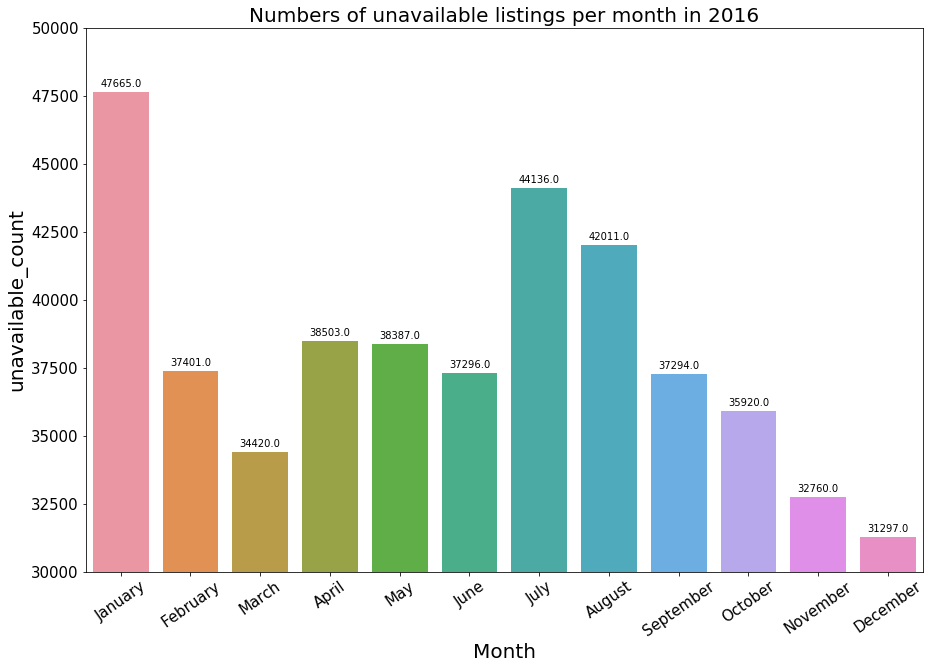

In [234]:
## plot result on a bar chart, zoomed output
fig, ax = plt.subplots(figsize=(15,10))
bars = sns.barplot(x=df2_resample.index.month_name(), y=df2_resample.unavailable_count)
# set axis label properties
ax.set_xlabel('Month', weight='normal', size=20)
ax.set_ylabel('unavailable_count', weight='normal', size=20)
ax.set_ylim([30000,50000]) # increase the y origin from 0 to 100
plt.title('Numbers of unavailable listings per month in 2016', fontsize=20)
# set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
#attach a text lable above each bar displaying the price
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate('{:.1f}'.format(height), xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3), # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

##### From the plot, January is the busiest month in seattle for airbnb. To prove the Hypothesis, the number of available listing should be lowest in january.
##### Proof:

In [235]:
df3 = calendar.loc[calendar['available']== 't']

In [237]:
df3.drop(['price'], axis=1, inplace=True)

C:\Users\me\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [238]:
df3.head()

,listing_id,date,available
0,241032,2016-01-04,t
1,241032,2016-01-05,t
9,241032,2016-01-13,t
10,241032,2016-01-14,t
14,241032,2016-01-18,t


In [240]:
df3.index = df3.date

In [241]:
df3.head()

,listing_id,date,available
date,,,
2016-01-04,241032,2016-01-04,t
2016-01-05,241032,2016-01-05,t
2016-01-13,241032,2016-01-13,t
2016-01-14,241032,2016-01-14,t
2016-01-18,241032,2016-01-18,t


In [242]:
df3_counts = df3.resample('M').available.value_counts()

In [245]:
df3_counts

date        available
2016-01-31  t            59239
2016-02-29  t            73321
2016-03-31  t            83938
2016-04-30  t            76037
2016-05-31  t            79971
2016-06-30  t            77244
2016-07-31  t            74222
2016-08-31  t            76347
2016-09-30  t            77246
2016-10-31  t            82438
2016-11-30  t            81780
2016-12-31  t            87061
2017-01-31  t             5698
Name: available, dtype: int64

In [246]:
df3_resample= pd.DataFrame(df3_counts)

In [249]:
# drop 2017 jan data
df3_resample.drop(df3_resample.index[-1], inplace=True)

In [250]:
df3_resample

,,available
date,available,
2016-01-31,t,59239
2016-02-29,t,73321
2016-03-31,t,83938
2016-04-30,t,76037
2016-05-31,t,79971
2016-06-30,t,77244
2016-07-31,t,74222
2016-08-31,t,76347
2016-09-30,t,77246


In [251]:
# change index name
df3_resample.index = df3_resample.index.set_names(['date','labels'])

In [253]:
df3_resample.head()

,,available
date,labels,
2016-01-31,t,59239
2016-02-29,t,73321
2016-03-31,t,83938
2016-04-30,t,76037
2016-05-31,t,79971


In [254]:
df3_resample.reset_index(inplace=True)

In [255]:
# convert to time series
df3_resample.index = df3_resample.date

In [256]:
df3_resample.head()

,date,labels,available
date,,,
2016-01-31,2016-01-31,t,59239
2016-02-29,2016-02-29,t,73321
2016-03-31,2016-03-31,t,83938
2016-04-30,2016-04-30,t,76037
2016-05-31,2016-05-31,t,79971


In [260]:
df3_resample.rename(columns={'available':'available_counts'}, inplace=True)

In [261]:
df3_resample

,date,labels,available_counts
date,,,
2016-01-31,2016-01-31,t,59239
2016-02-29,2016-02-29,t,73321
2016-03-31,2016-03-31,t,83938
2016-04-30,2016-04-30,t,76037
2016-05-31,2016-05-31,t,79971
2016-06-30,2016-06-30,t,77244
2016-07-31,2016-07-31,t,74222
2016-08-31,2016-08-31,t,76347
2016-09-30,2016-09-30,t,77246


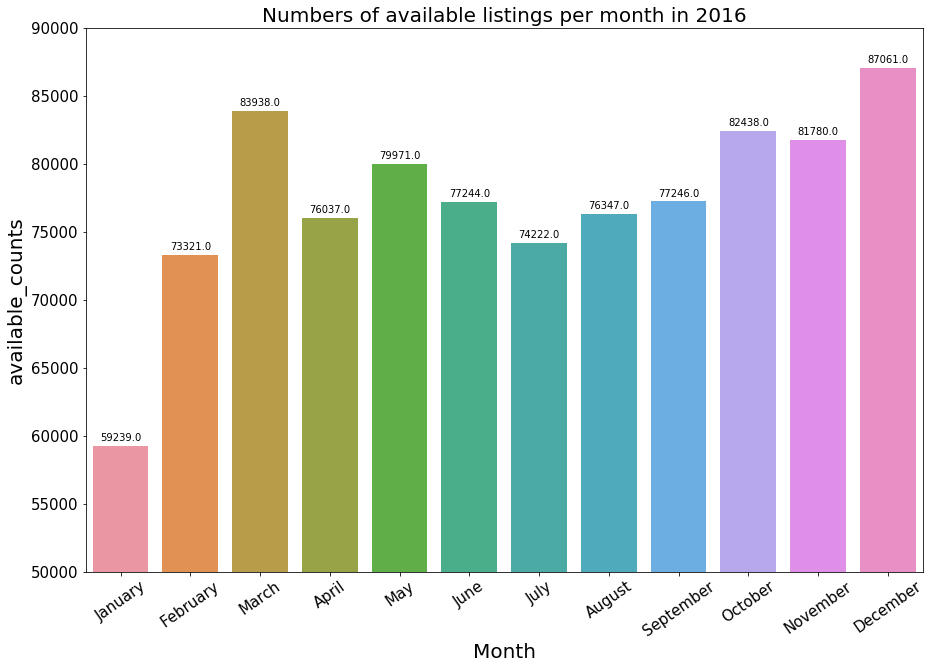

In [268]:
## plot result on a bar chart, zoomed output
fig, ax = plt.subplots(figsize=(15,10))
bars = sns.barplot(x=df3_resample.index.month_name(), y=df3_resample.available_counts)
# set axis label properties
ax.set_xlabel('Month', weight='normal', size=20)
ax.set_ylabel('available_counts', weight='normal', size=20)
ax.set_ylim([50000,90000]) # increase the y origin from 0 to 100
plt.title('Numbers of available listings per month in 2016', fontsize=20)
# set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
#attach a text lable above each bar displaying the price
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate('{:.1f}'.format(height), xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3), # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')